<a href="https://colab.research.google.com/github/hugodiasbr/biblioteca_pandas/blob/main/Case_2_Varejo_HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

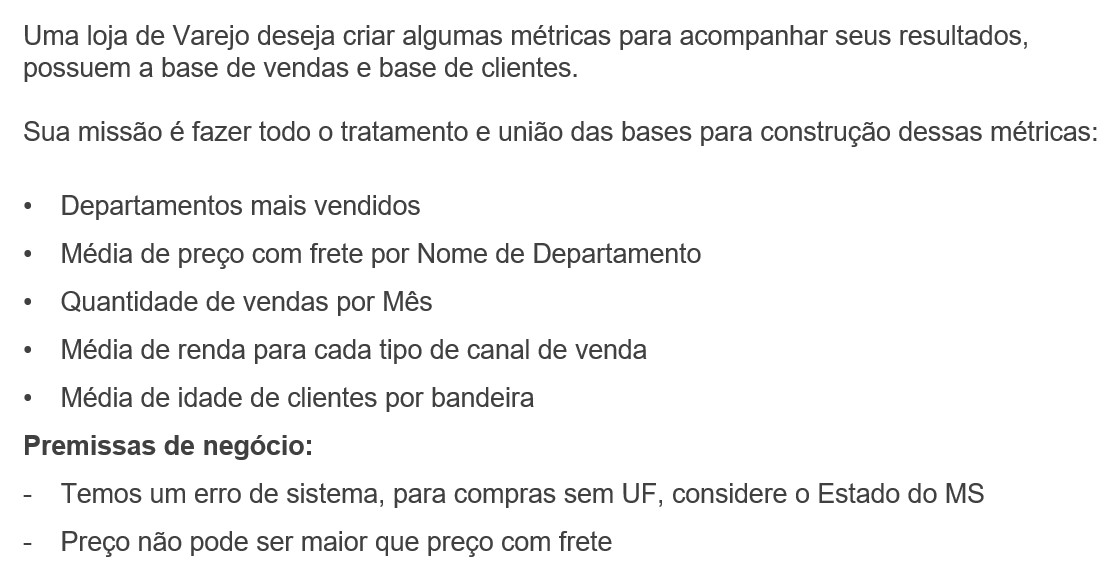

# Trabalhando com duas Bases de Dados

# Aula 282 - Configurando os dados




In [1]:
import pandas as pd
import seaborn as sns

# 1. Vamos importar a base de Varejo, para analisar as vendas.

Vamos chamar a o arquivo Varejo.xlsx de tabela de "Vendas"

In [2]:

vendas = pd.read_excel("varejo.xlsx")

vendas.head()


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042,Errado
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,Correto
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,Correto
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,Correto
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790,Correto


* 2. Analisando as Informações da tabela de Varejo

Vamos utilizar a função info()
Sintaxe: <name da tabela>.<função info()>

In [ ]:
#vendas.info()

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   idcompra                  80228 non-null  int64         
 1   idcanalvenda              80228 non-null  object        
 2   bandeira                  80228 non-null  object        
 3   Data                      80228 non-null  datetime64[ns]
 4   Preço                     79926 non-null  float64       
 5   Preço_com_frete           80228 non-null  float64       
 6   Nome_Departamento         80228 non-null  object        
 7   estado                    79926 non-null  object        
 8   cliente_Log               80228 non-null  int64         
 9   Preços > Preço com Frete  80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


* 3. Utilizando a função <nunique( )> para analisar valores distintos entre colunas

A função < nunique( ) > do Pandas em Python é utilizada para calcular o número de valores únicos em uma coluna de um DataFrame. Ela funciona de forma semelhante ao comando distinct


In [ ]:
# A função nunique() do Pandas em Python é utilizada para calcular o número de
# valores únicos em uma coluna de um DataFrame. Ela funciona de forma semelhante ao comando distinct
#
# 1. Vamos Analisar primeiramente a coluna idcanalvenda, e vamos informar a coluna idcompra no nunique para saber a qtde de linhas

#vendas.groupby("idcanalvenda").idcompra.nunique()


vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()




,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


* Note que o canal de venda APP e Aplicativo são a mesma coisa, então vamos renomear o APP para Aplicativo.

In [ ]:
#vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
#vendas.groupby("idcanalvenda").idcompra.nunique()


vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP","Aplicativo")

# Vendo como ficou o Replace

vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()




,idcanalvenda,idcompra
0,Aplicativo,21539
1,Internet,24515
2,Mobile,24732


* 4. Utilizando a função <nunique( )> para analisar valores distintos entre colunas. Vamos analisar a categoria "bandeira" agora

In [ ]:
#vendas.groupby("bandeira").idcompra.nunique()

vendas.groupby("bandeira").idcompra.nunique().reset_index()


,bandeira,idcompra
0,A,27679
1,B,38483


* 5. Utilizando a função <nunique( )> para analisar valores distintos entre colunas. Vamos analisar a categoria "Nome_Departamento" agora

In [ ]:
#vendas.groupby("Nome_Departamento").idcompra.nunique()


vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()



,Nome_Departamento,idcompra
0,Acessorios e Inovacoes,3548
1,Alimentos,2
2,Ar e Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza e Saude,4626
7,Brinquedos,1320
8,"Cama, Mesa e Banho",153
9,Casa e Construcao,263


* 6. Utilizando a função <nunique( )> para analisar valores distintos entre colunas. Vamos analisar a categoria de "estado" agora

In [ ]:
#vendas.groupby("estado").idcompra.nunique()


vendas.groupby("estado").idcompra.nunique().reset_index()

,estado,idcompra
0,AC,10
1,AL,461
2,AM,15
3,AP,3
4,BA,2028
5,CE,1007
6,DF,1902
7,ES,1254
8,GO,1603
9,MA,129


* 7. Agora vamos corrigir os espaços em branco dos valores contidos no campo Nome_Departamento, substituindo os espaços em brando por underscore

In [ ]:
#vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ","_")
#vendas.groupby("Nome_Departamento").idcompra.nunique()



vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")

#vendas.info()

vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()



,Nome_Departamento,idcompra
0,Acessorios_e_Inovacoes,3548
1,Alimentos,2
2,Ar_e_Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza_e_Saude,4626
7,Brinquedos,1320
8,"Cama,_Mesa_e_Banho",153
9,Casa_e_Construcao,263


# Aula 283 - Tratamento de Nulos

In [ ]:
#vendas.info()

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   idcompra                  80228 non-null  int64         
 1   idcanalvenda              80228 non-null  object        
 2   bandeira                  80228 non-null  object        
 3   Data                      80228 non-null  datetime64[ns]
 4   Preço                     79926 non-null  float64       
 5   Preço_com_frete           80228 non-null  float64       
 6   Nome_Departamento         80228 non-null  object        
 7   estado                    79926 non-null  object        
 8   cliente_Log               80228 non-null  int64         
 9   Preços > Preço com Frete  80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


* 1. Filtrando registros nulos

In [ ]:
#vendas[vendas["estado"].isnull()]

vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804,Correto
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359,Correto
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691,Correto
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024,Correto
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121,Correto
...,...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873,Correto
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772,Correto
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399,Correto
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784,Correto


* 2. Eliminando Resgistros nulos

In [ ]:
# Vamos criar uma base(tabela) nova para manter nela somente os registros não nulos.


vendas_sem_nulos = vendas.dropna()

vendas_sem_nulos.info()


#vendas_sem_nulos = vendas.dropna()
#vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   idcompra                  79926 non-null  int64         
 1   idcanalvenda              79926 non-null  object        
 2   bandeira                  79926 non-null  object        
 3   Data                      79926 non-null  datetime64[ns]
 4   Preço                     79926 non-null  float64       
 5   Preço_com_frete           79926 non-null  float64       
 6   Nome_Departamento         79926 non-null  object        
 7   estado                    79926 non-null  object        
 8   cliente_Log               79926 non-null  int64         
 9   Preços > Preço com Frete  79926 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.7+ MB


* 3. Substituindo Resgistros Nulos

Vimos acima como eliminar linhas de registro que possuíam algum dado nulo. porém como temos que uma das premissas é "...Para compras sem UF, considere o estado do Mato Grosso do Sul", vamos preencher as UF's nulas com a sigla MS.

Vamos fazer isso com o método "fillna()"



In [ ]:
# Aqui também vamos utilizad a função "inplace=True". Ela serve para manter na base original (vendas), o valor incluído ("MS")
# Uma forma anterior que vimos, de como incluir em definitivo um valor em um registro, seria fazendo a base original(vendas) receber
# ela mesma utilizandoo método desejado, "replace" ou o próprio "fillna", desta forma:
# vendas["estado"] = vendas["estado"].fillna("MS")
# Mas também podemos fazer conforme abaixo, utilizando o "inplace=True"


vendas["estado"].fillna("MS", inplace=True)


<ipython-input-25-e280509b431a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["estado"].fillna("MS", inplace=True)


* 4. Verificando se o campo estado foi preenchido

In [ ]:

vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   idcompra                  80228 non-null  int64         
 1   idcanalvenda              80228 non-null  object        
 2   bandeira                  80228 non-null  object        
 3   Data                      80228 non-null  datetime64[ns]
 4   Preço                     79926 non-null  float64       
 5   Preço_com_frete           80228 non-null  float64       
 6   Nome_Departamento         80228 non-null  object        
 7   estado                    80228 non-null  object        
 8   cliente_Log               80228 non-null  int64         
 9   Preços > Preço com Frete  80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


* 5. Preenchendo os dados nulos de preço

Para preenher os campos de preço que estão nulos, vamos pegar os preços de todos registros que não estão nulos, e fazer uma média deles. Essa média será nosso preço que vamos colocar nos registros que estão nulos.

In [ ]:
# Criando uma variável para receber a média:

media_preco = vendas["Preço"].mean()


# Agora vamos preencher os registros nulos com a média de preço calculada e armazenada na variável media_preco

vendas["Preço"].fillna(media_preco, inplace=True)


#vendas["Preço"].fillna(media_preco, inplace= True)

<ipython-input-29-e32597bc5d61>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["Preço"].fillna(media_preco, inplace=True)


* 6. Vendo o resultado armazenado na variável media_preco

In [ ]:
# Imprimindo a variável media_preco

media_preco



906.5891285439033

* 7. Vendo se os registros nulos de preço foram preenchidos

In [ ]:
# Imprimindo informações da tabela vendas

vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   idcompra                  80228 non-null  int64         
 1   idcanalvenda              80228 non-null  object        
 2   bandeira                  80228 non-null  object        
 3   Data                      80228 non-null  datetime64[ns]
 4   Preço                     80228 non-null  float64       
 5   Preço_com_frete           80228 non-null  float64       
 6   Nome_Departamento         80228 non-null  object        
 7   estado                    80228 non-null  object        
 8   cliente_Log               80228 non-null  int64         
 9   Preços > Preço com Frete  80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


* 8. Poderíamos também incluir no campo "Preço" a mediana ou invés da média, então, poderia ser utilizado a função "median()" conforme abaixo:

In [ ]:
# Recebendo a mediana na variavel mediana_preco

mediana_preco = vendas["Preço"].median()

# Imprimindo a variável mediana_preco

mediana_preco

532.448

# Aula 284 - Filtrando Dados

Depois de feito o tratamento e limpeza dos dados, agora vamos começar a utilizá-los

In [ ]:
vendas.head()



,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042,Errado
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,Correto
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,Correto
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,Correto
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,Correto


* 1. Fazendo Describe somente das colunas que quero analisar

In [ ]:
# Filtrando as colunas utilizando a função describe()

vendas[["Preço", "Preço_com_frete"]].describe()


#vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


* 2. Separando Preços que são maiores do que Preço com Frete


Aqui estamos atendendo à Premissa de negócio "Preço não pode ser maior que Preço com Frete"

In [5]:
# Armazenando Preço > Preço com frete na variável preco_errado

preco_errado = vendas.query("Preço > Preço_com_frete")

preco_errado


# Armazenando Preço < Preço com frete na variável preco_correto

vendas_correto = vendas.query("Preço < Preço_com_frete")


vendas_correto

#preco_errado = vendas.query("Preço > Preço_com_frete")

#vendas_correto = vendas.query("Preço < Preço_com_frete")

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,Correto
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Correto
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Correto
...,...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones e Celulares,SP,11429,Correto
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza e Saude,SP,26,Correto
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones e Celulares,SP,3128,Correto
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza e Saude,RJ,13206,Correto


In [ ]:
# Analisando como ficou:

vendas_correto.describe()




,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


* 3. Fazendo alguns filtros de "e" e "ou" para relembrar

In [ ]:
# Imprimindo o conteúdo da tabela vendas_correto

vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Correto
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Correto


* 4. Filtro utilizando "and" ("e")

In [ ]:
# Analisando os dados de vendas_correto utilizando describe()

vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

#vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


* 5. Utilizando o Groupby para responder algumas métricas

5.1. Métrica 1: Departamentos mais vendidos

In [ ]:
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

#vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


5.2 Métrica 2: Média de Preço com Frete por Nome de Departamento

Aqui vamos utilizar a função "round" para arredondar o número de casas do Preço com Frete



In [ ]:
vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index()

# Utilizando a função "round" para arredondar o número de casas decimais

round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)



,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


5.3 Métrica 3: Quantidade de vendas por mês

In [ ]:
vendas_correto

vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False).reset_index()


#vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False)

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


6. No exemplo acima, agrupamos por data no formato dia-mes-ano.
Vamos ver como fazer somente por mês.

Para isso, famos utilizar a função "dt.month"

In [6]:
# Vamos criar uma coluna nova para armazenar o mês, já convertendo ele para o formato mm (formato numérico)

vendas_correto["mes"] = vendas_correto['Data'].dt.month;

vendas_correto.head()



<ipython-input-6-d25474f0dcce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto['Data'].dt.month;


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,Correto,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Correto,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Correto,2


7. Agora vamos agrupar pelo campo "mes", para vermos como fica:

In [ ]:

vendas_correto.groupby('mes').idcompra.nunique().sort_values(ascending=False).reset_index()

#vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending=False)

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


# Aula 285 - Realizando Join

Após analisarmos as 3 primeiras métricas, agora vamos analisar as próximas que são:

* Média de renda para cada tipo de Canal de Venda

* Média de idade de clientes por bandeira

In [7]:

#Importando a base de clientes varejo

cliente = pd.read_excel("/content/cliente_varejo.xlsx")


cliente.head()





,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Correto,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Correto,2


In [ ]:
#cliente[["idade", "renda"]].describe()


cliente[["idade", "renda"]].describe()


,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
#cliente.info()


cliente.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
#cliente = cliente.astype({"renda":"float"})
#cliente.info()

#transformando o tipo de dados do campo "renda", para float

cliente = cliente.astype({"renda":"float"})

cliente.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [9]:
#vendas_cliente = vendas_correto.merge(cliente, how= "left", on="cliente_Log")
#vendas_cliente.head()

#fazendo join no python

vendas_cliente = vendas_correto.merge(cliente, how="left", on="cliente_Log")
vendas_cliente.head()




,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preços > Preço com Frete,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto,3,47,8258
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,Correto,3,26,9207
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,Correto,3,58,9204
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,Correto,3,48,2796
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto,2,78,6596


* Respondendo a Premissa: Média de renda para cada tipo de Canal de Venda

In [10]:
agg_id_canal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)

#mostrando

agg_id_canal_renda


#agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
#agg_idcanal_renda

,idcanalvenda,renda
0,APP,8429.45
1,Aplicativo,8240.83
2,Mobile,8223.93
3,Internet,8215.03


* Respondendo a Premissa: Média de idade de clientes por bandeira

In [11]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)


agg_idade_bandeira


#agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
#agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.28


# Aula 286 - Transformando em visualizações I

Agora vamos aplicar o Data Visualization, utilizando gráficos

In [12]:

import matplotlib.pyplot as plt

#import matplotlib.pyplot as plt

* 1. Criando gráfico para bandeira

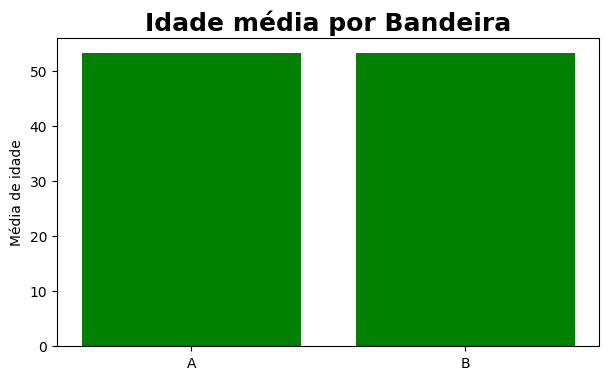

In [20]:
# Utilizando a função fig para setar o tamanho da figura que queremos. O figsite é largura x altura

fig = plt.figure(figsize=(7,4))

# agora vamos chamar o "bar" que é o tipo de gráfico de barras, passando a bandeira para o eixo X e a idade no eixo y, na cor verde

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color = "green")


#Colocando o nome do eixo y como "Media de idade"
plt.ylabel("Média de idade")


#colocando o Título do grafico e ajustando posição do título, tamanho da fonte, tipo da fonte e cor da fonte

plt.title("Idade média por Bandeira", loc="center", fontsize=18, fontweight="bold", color= "black");

2. Criando gráfico para canal de renda

Text(0.5, 1.0, 'Renda média por canal de venda')

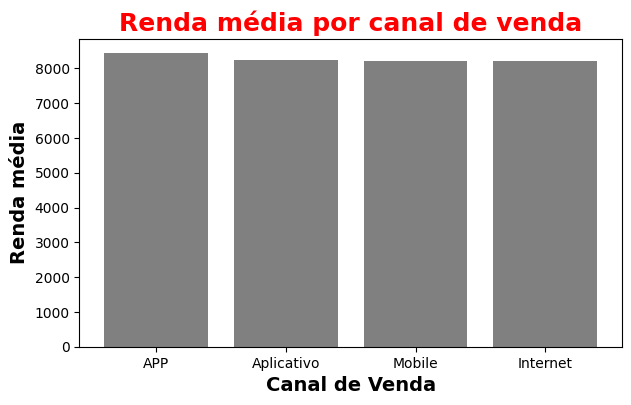

In [23]:
#chamando a função fig que seta o tamanho da figura
fig = plt.figure(figsize=(7,4))

#definindo o tipo de grafico que será de barras e os campos para eixo X e Y

plt.bar(agg_id_canal_renda["idcanalvenda"], agg_id_canal_renda["renda"], color="grey")


#definindo o título do eixo Y e X

plt.ylabel("Renda média", loc="center", fontsize=14, fontweight="bold")

plt.xlabel("Canal de Venda", loc="center", fontsize=14, fontweight="bold")


#Definindo o título do gráfico

plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="red")

#plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black");

3. Verificando quantidade de vendas por Data na tabela vendas correto

In [27]:
#printando novamente a tabela vendas correto, para analisar ela
#vendas_correto.head()
# Aqui vamos armazenar na tabela que vamos chamar de venda_por_data, o agrupamento de qtde de vendas por data
# para que possamos posteriormente, gerar um grafico

venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()

venda_por_data




,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,187
3,2023-01-05,203
4,2023-01-06,198
...,...,...
114,2023-04-26,199
115,2023-04-27,211
116,2023-04-28,190
117,2023-04-29,186


4. Gerando gráfico de linha, para mostrar qtde de vendas por data

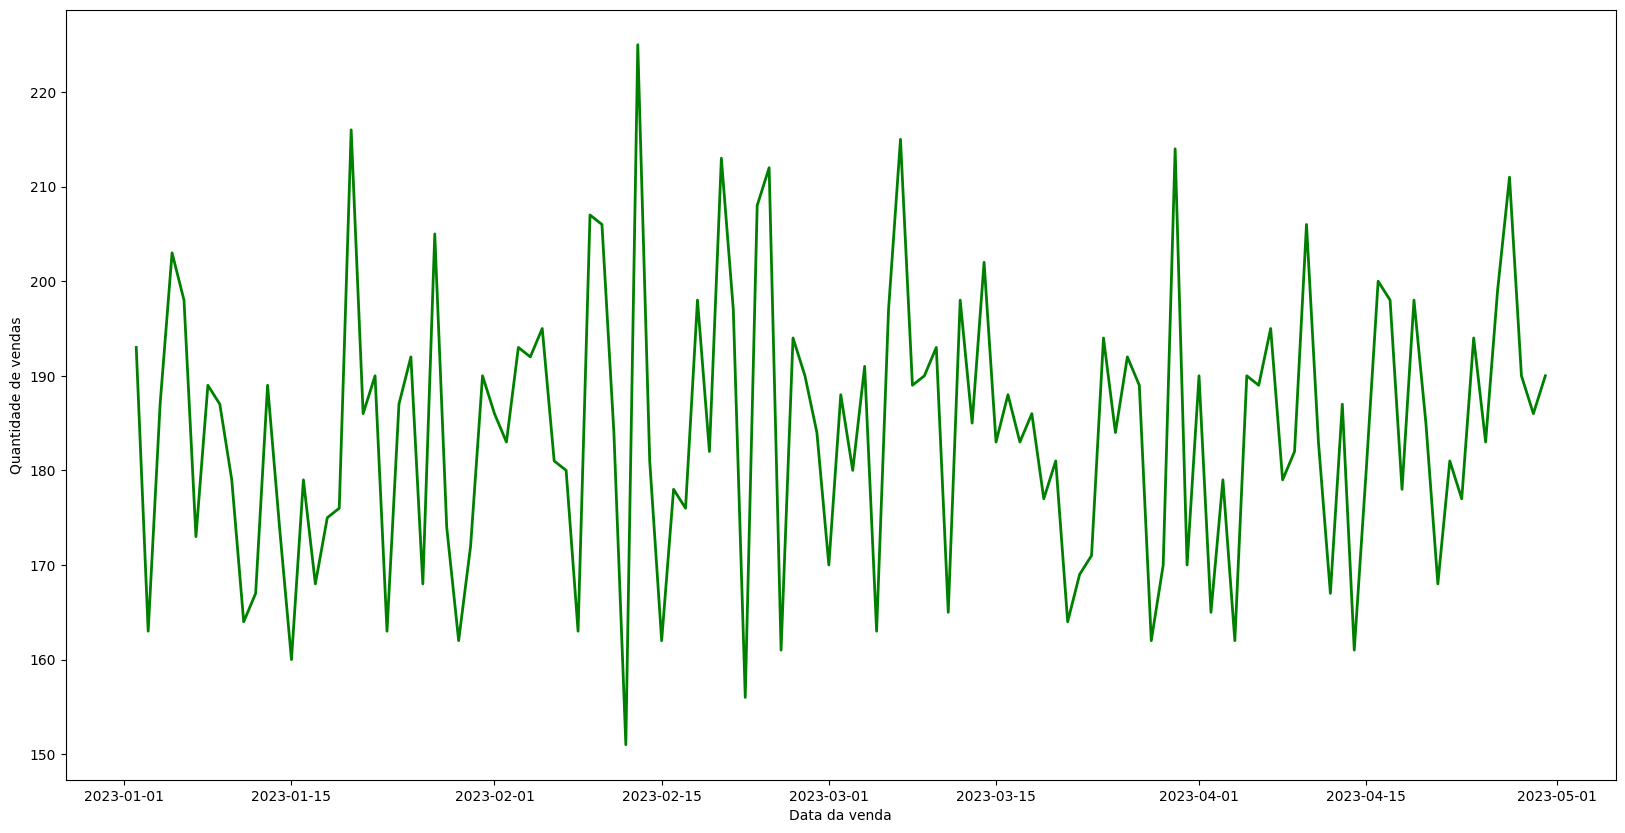

In [36]:
# 1. Chamando a função fig para definir o tamanho do gráfico

fig = plt.figure(figsize=(20,10))



# 2. definindo o gráfico de linhas

#definindo titulo do eixo X e Y
plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")

#definindo os valores que receberão o eixo X e Y
x= venda_por_data["Data"]
y= venda_por_data["idcompra"]

#Plotando o gráfico
plt.plot(x, y, color="green", linewidth = "2")
plt.show()


5. Grafico de média de "preço com Frete" por "Nome de Departamento"

In [41]:
# 1. Criando uma tabela para receber os valores agrupados, para depois gerar o gráfico

agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco



,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,3729.60
1,Informatica,2156.76
2,Linha Industrial,2027.11
3,Cine e Foto,1851.20
4,Eletrodomesticos,1396.84
5,Telefones e Celulares,1394.18
6,Esporte e Lazer,1122.31
7,Tablets,1073.82
8,Games,942.90
9,Instrumentos Musicais,834.61


6. Gerando o gráfico de Barras de média de preço com frete, por departamento

Text(0.5, 1.0, 'Preço médio por departamento')

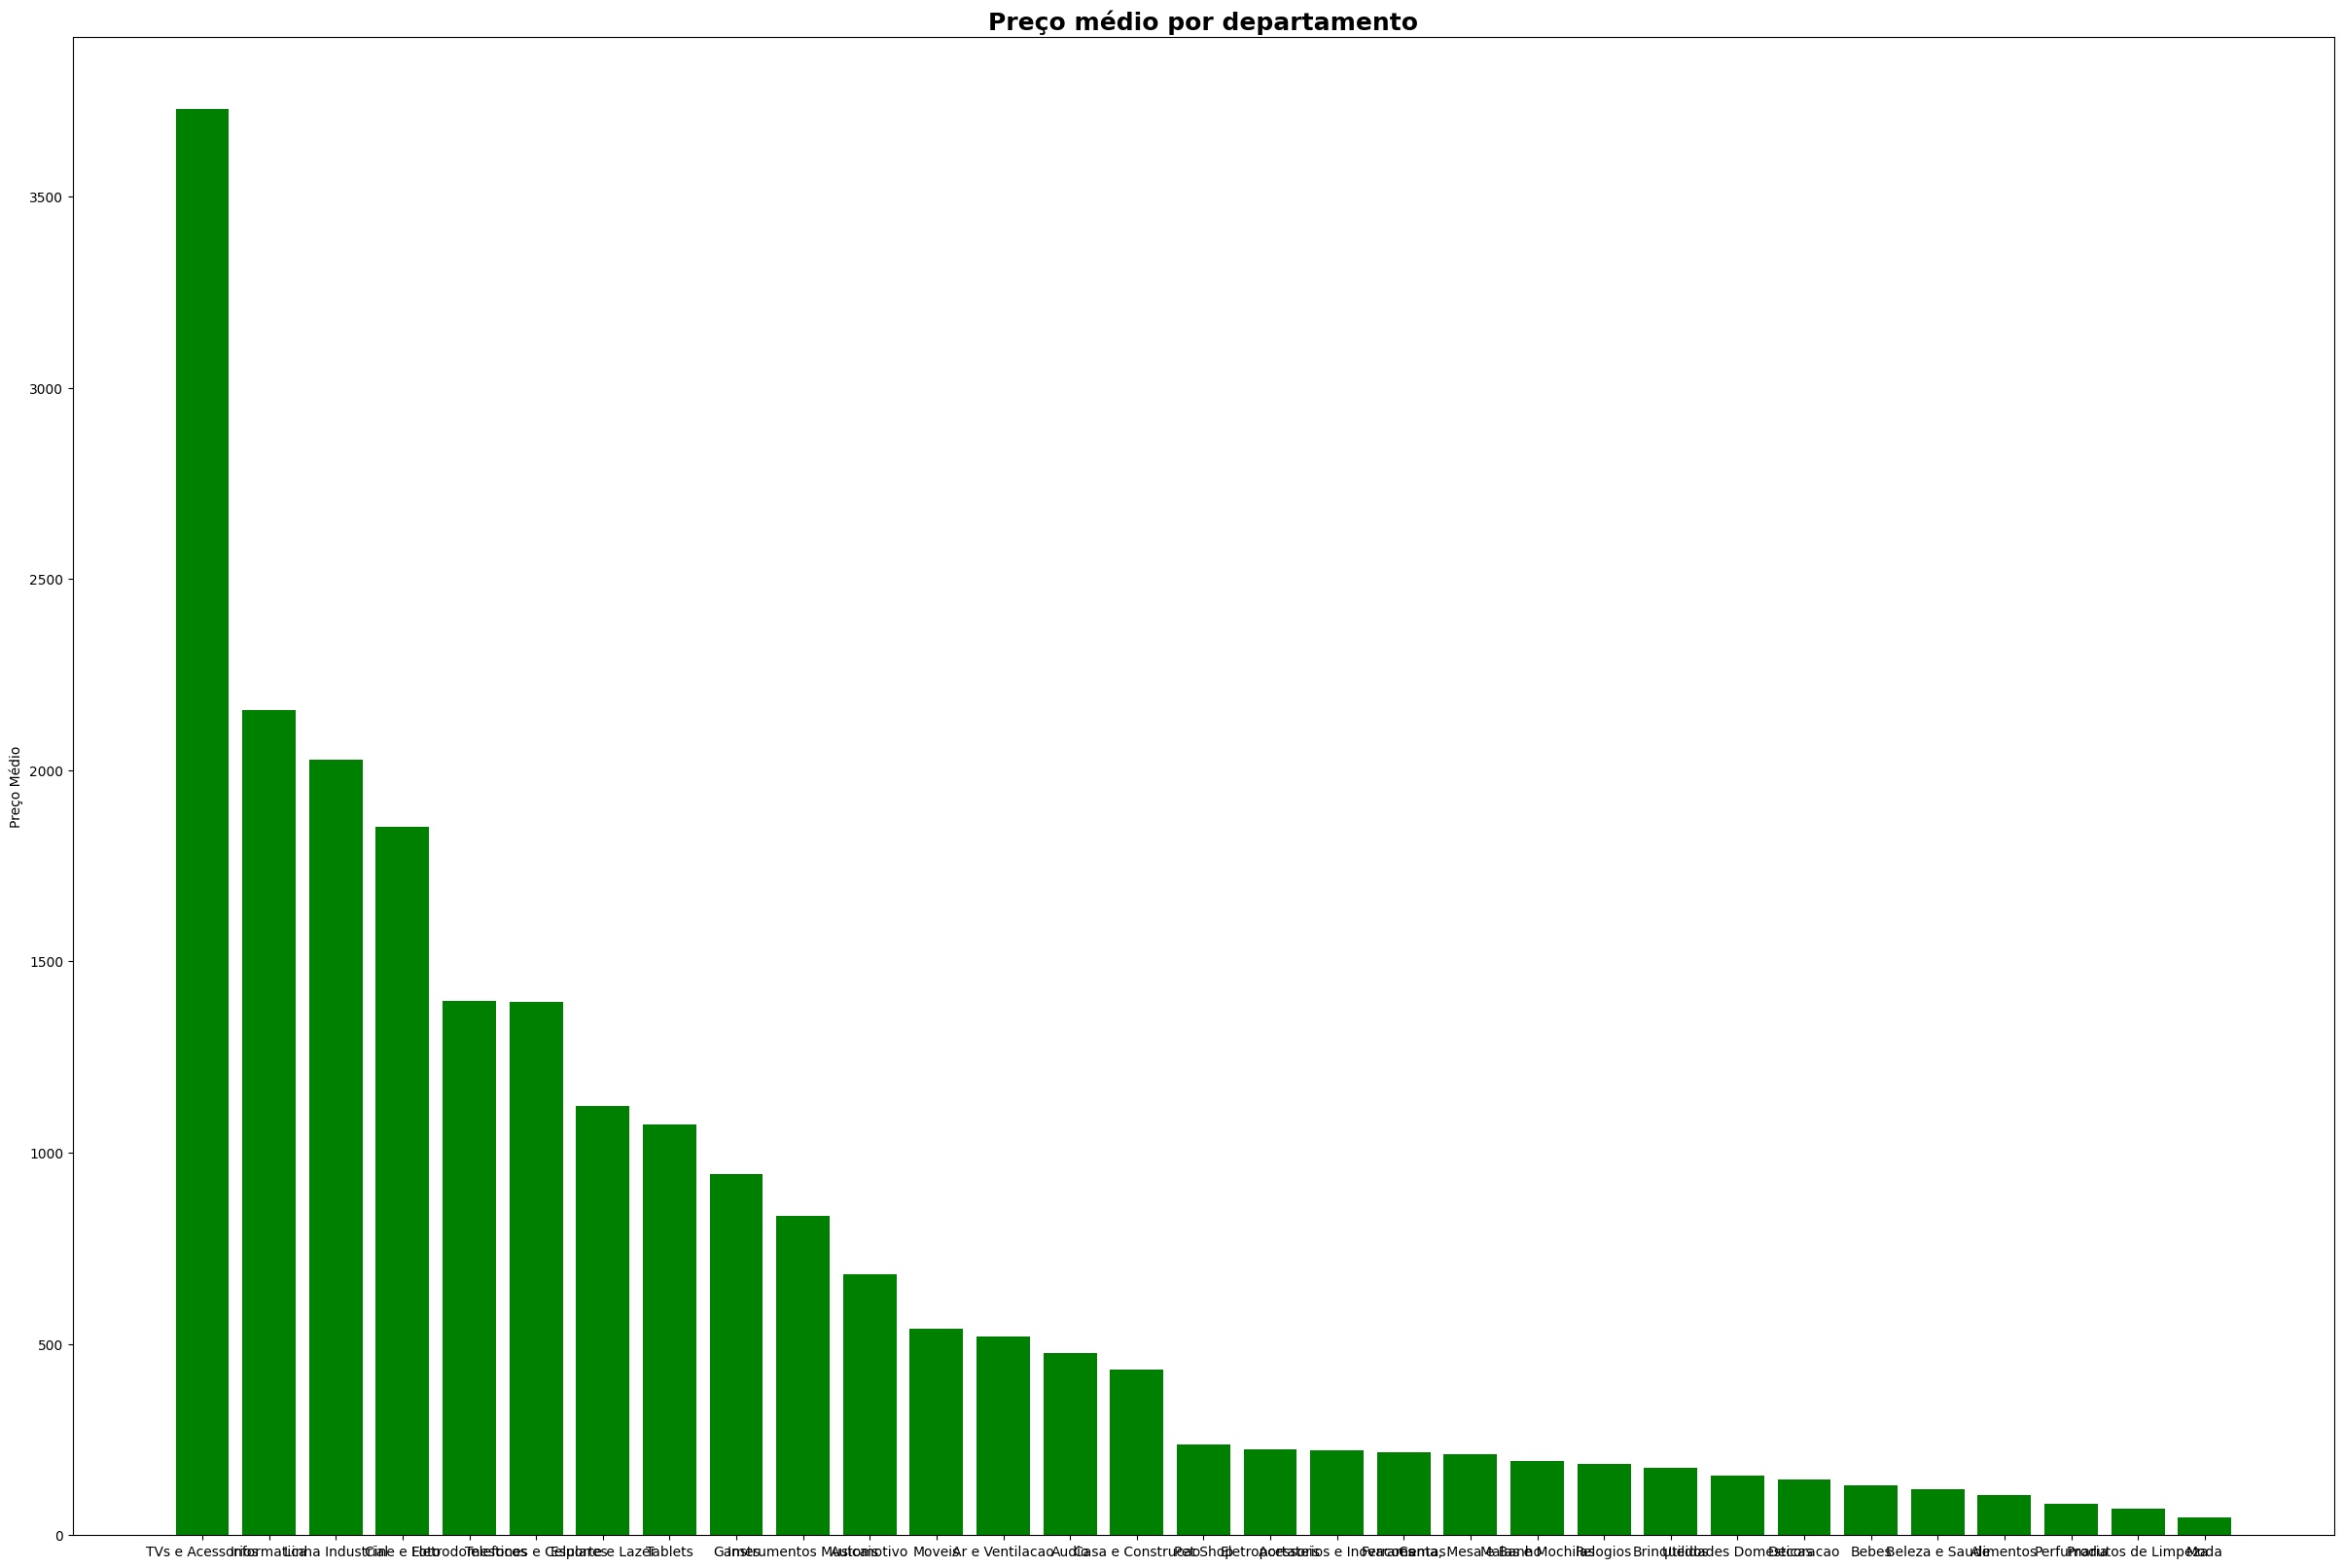

In [46]:
#função fig para definir tamanho do gráfico

fig = plt.figure(figsize=(30,20))


#Definindo valores no eixo X e Y, para o gráfico de barras

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="green")


# Definindo título do eixo Y

plt.ylabel("Preço Médio")

# Definindo título do gráfico

plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black")


# Aula 287 - Transformando em visualizações II

* Agora vamos utilizar outra ferramenta visual, a "Plotly".
Ela é uma ferramenta mais robusta e com melhor visual para geração de gráficos.

1. Instalando as bibliotecas necessárias para utilizar o Plotly

In [48]:


%pip install plotly
%pip install cufflinks
%pip install chart-studio


#%pip install plotly
#%pip install cufflinks
#%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.8 MB/s eta 0:00:00


2. Agora vamos importar essas bibliotecas para dentro do python

In [49]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

3. Criando o primeiro gráfico de barras de bandeira por idade

In [50]:
# vamos utilizar o express para gerar este grafico

px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

#px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

4. Criando gráfico de linhas para qtde de vendas por data

In [52]:
px.line(venda_por_data, x = "Data", y = "idcompra")

#px.line(venda_por_data, x= "Data", y="idcompra")

5. Analisando a tabela agg_dept_preco para gerar outro gráfico

In [53]:
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,3729.60
1,Informatica,2156.76
2,Linha Industrial,2027.11
3,Cine e Foto,1851.20
4,Eletrodomesticos,1396.84
5,Telefones e Celulares,1394.18
6,Esporte e Lazer,1122.31
7,Tablets,1073.82
8,Games,942.90
9,Instrumentos Musicais,834.61


6. Gerando gráfico de barras de preço com frete por Departamento

In [54]:
px.bar(agg_dept_preco, x= "Nome_Departamento", y = "Preço_com_frete")


#px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete")